# An Explanatory Analysis of Solar PV Installations Across Australian States and Territories in 2023

This report analyzes the average kilowatts per installation and installations per capita to assess solar energy adoption across Australia’s states and territories.

The key findings are:

- Larger, More Powerful Systems: The average kilowatts per installation reveals a growing preference for larger and more efficient solar systems, particularly in the Northern Territory (NT) and New South Wales (NSW). This trend reflects a shift toward more capable solar technologies in these regions.

- Higher Solar Penetration on the East Coast: Installations per capita show a higher penetration of solar energy in communities along the East Coast, indicating broader acceptance and adoption of solar technology in these areas.

- Regional Disparities: Overall, the findings highlight regional disparities in solar adoption. The Northern Territory presents an opportunity to further enhance energy capacity and resilience, while the East Coast reflects higher rates of solar usage, driven by greater accessibility, affordability, and awareness

In [47]:
# format text and decimals
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',None) # None for no lim
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# Import pandas for data manipulation
import pandas as pd # data manipulation
# For visualization
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
# read population data
%pip install openpyxl

### 1. Data sets

**About the data**:
For this project, I have used three datasets:
 - **Solar PV Installation**: Data on small-scale solar photovoltaic (PV) installations across Australia from the Australian Government Clean Energy Regulator (CER). This dataset is availabe in the csv format and includes information on the location (postcodes), capacity in KW, quantity and installation date of solar PV systems.
 - **Population Data**: Population data aggregated by quarters at states level, downloaded from Australian Bureau of Statistics (ABS) as `.xlsx` format.
 - **Postcode Data**: Postcode data used to join the solar energy data with the population data. 

In this section, we will:
1. Download the data programmatically
2. Load the data into a pandas DataFrame
3. Examine the data and identify relevant columns
4. Clean and normalize the data set


#### 1. Load the solar photovoltaic (PV) installations dataset

The dataset is available as a CSV file in a wide format, with installation dates entered as a separate columns. 


In [13]:
# read the dataset and assign as `sgu`
sgu =  pd.read_csv('../data/IntialProject.csv')

##### 1. 2. Examine the data

In this section, I will check the data overview:

- datatype and convert if regquired
- dimensions of the dataset (number of rows and columns)
- data entry error and completeness of the data 

In [14]:
# look at the top five rows
sgu.head()

,Small Unit Installation Postcode,Previous Years (2001-2022) - Installation Quantity,Previous Years (2001-2022) - SGU Output Rated Output In kW,Jan 2023 - Installations Quantity,Jan 2023 - SGU Rated Output In kW,Feb 2023 - Installations Quantity,Feb 2023 - SGU Rated Output In kW,Mar 2023 - Installations Quantity,Mar 2023 - SGU Rated Output In kW,Apr 2023 - Installations Quantity,Apr 2023 - SGU Rated Output In kW,May 2023 - Installations Quantity,May 2023 - SGU Rated Output In kW,Jun 2023 - Installations Quantity,Jun 2023 - SGU Rated Output In kW,Jul 2023 - Installations Quantity,Jul 2023 - SGU Rated Output In kW,Aug 2023 - Installations Quantity,Aug 2023 - SGU Rated Output In kW,Sep 2023 - Installations Quantity,Sep 2023 - SGU Rated Output In kW,Oct 2023 - Installations Quantity,Oct 2023 - SGU Rated Output In kW,Nov 2023 - Installations Quantity,Nov 2023 - SGU Rated Output In kW,Dec 2023 - Installations Quantity,Dec 2023 - SGU Rated Output In kW,Jan 2024 - Installations Quantity,Jan 2024 - SGU Rated Output In kW,Installations Quantity Total,SGU Rated Output In kW Total
0,0,4,4.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,4,4.00
1,200,1,0.08,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,1,0.08
2,800,125,3361.68,0,0.00,0,0.00,0,0.00,1,19.98,2,120.96,0,0.00,1,39.96,2,55.15,0,0.00,0,0.00,1,62.25,0,0.00,0,0.00,132,3659.98
3,801,11,377.00,0,0.00,0,0.00,0,0.00,0,0.00,1,9.60,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,12,386.60
4,803,2,11.69,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,2,11.69


The SGU data summary overview indicates that there are no null values in the dataframe. However, the Postcode is entered as integer and needs to converted to an `object`.

In [ ]:
# Dataset overview - completeness and data type
sgu.info();

There are 2,809 observations and 31 columns in the dataframe.

In [16]:
# print the number of rows and columns - 2809 observations and 31 column
print("Dimension of the dataframe:", sgu.shape)

Dimension of the dataframe: (2809, 31)


**Initial observations:**

- The data frame is wide (33 columns) and appears pivoted
- Postcode has been incorrectly interpreted as an integer
- The totals columns and the 2001-2022 columns represents a different *order* of data

The solar PV installation dataset captured installation quantity (household) and SGU rated output in KW for three years in different time periods. 

- 2021 - 2022: yearly aggregated, 
- 2023: monthly data 
- 2024: data for January only. 

##### Clean the data

Given our initial observation, we will:

1. Convert postcode to string padded with 0's
2. Create a separate dataframe for previous years
3. Remove all columns that are not monthly totals
4. Unpivot the remaining data

**Rename column**

In [18]:
# Convert postcode to string padded with 0's
sgu['Small Unit Installation Postcode'] = sgu['Small Unit Installation Postcode'].astype('string').str.zfill(4)

Rename the columns to simpler and easier names for communication:

In [19]:
# rename: from `Small Unit Installation Postcode` to postcode`
sgu = sgu.rename(columns={'Small Unit Installation Postcode': 'postcode'})

Drop coulmns that won't be used for our analysis, including coulmns with totals, and create a separate dataframes by years of installation. 

**Remove column**

In [20]:
# drop the totals columns:
sgu = sgu.drop(columns=['Installations Quantity Total', 'SGU Rated Output In kW Total'])


In [21]:
# create a separate data frame for 2001-2022
sgu_2001_2022 = sgu[['postcode', 'Previous Years (2001-2022) - Installation Quantity',  'Previous Years (2001-2022) - SGU Output Rated Output In kW']]

sgu_2001_2022.columns = ['postcode', 'quantity', 'kW']

sgu_2001_2022.head()

,postcode,quantity,kW
0,0000,4,4.00
1,0200,1,0.08
2,0800,125,3361.68
3,0801,11,377.00
4,0803,2,11.69


The previous year's (2022) data is aggregated and the 2024 data is only one month. For this report,  only 2023 data from the Clean Energy Regulator is used.

In [22]:
# drop previous years and 2024
sgu_2023 = sgu.drop(columns = ['Previous Years (2001-2022) - Installation Quantity', 'Previous Years (2001-2022) - SGU Output Rated Output In kW', 'Jan 2024 - Installations Quantity', 'Jan 2024 - SGU Rated Output In kW'])

**Transform the data**

To examine the data and monitor the trend by installation dates and location, the data needs to be transformed from wide format into long format using the `melt()` function.

In [23]:

# melt = unpivot
unpivoted_df = pd.melt(sgu_2023, id_vars=['postcode'], 
                       var_name='date', 
                       value_name='value')


unpivoted_df[['date', 'metric']] = unpivoted_df['date'].str.split(' - ', expand=True)
unpivoted_df['metric'] = unpivoted_df['metric'].str.split(' ').str[-1]


# pivot_table = repivot on the remaining columns
unpivoted_df = unpivoted_df.pivot_table(index=['postcode', 'date'], columns='metric', values='value').reset_index()

unpivoted_df.columns.name = None # removes the name metric from the index

unpivoted_df = unpivoted_df.rename(columns={'kW': 'kw', 'Quantity': 'quantity'})[['postcode', 'date', 'kw', 'quantity']]

Filter postcodes with quantity >0

In [25]:
# include postcodes with quantity > 0
unpivoted_df = unpivoted_df.loc[unpivoted_df['quantity'] > 0]
unpivoted_df.head()

,postcode,date,kw,quantity
24,0800,Apr 2023,19.98,1.00
25,0800,Aug 2023,55.15,2.00
29,0800,Jul 2023,39.96,1.00
32,0800,May 2023,120.96,2.00
33,0800,Nov 2023,62.25,1.00


Transform the date from string object to a datetime object.

In [26]:
unpivoted_df['date'] = pd.to_datetime(unpivoted_df['date'], format='%b %Y')

In [27]:
unpivoted_df['date'].tail(12);

**Check missing value**

In [28]:
# check missing postcode and sum
unpivoted_df['postcode'].isnull().sum()

0

In [32]:
# Aggregate the quantity and installation by quarter at postcode level
postcode_capacity_quant_2023 = unpivoted_df.groupby(['postcode', pd.Grouper(key='date', freq='Q')])[['kw', 'quantity']].sum().reset_index()
postcode_capacity_quant_2023.head()

C:\Users\User\AppData\Local\Temp\ipykernel_9264\3122374430.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  postcode_capacity_quant_2023 = unpivoted_df.groupby(['postcode', pd.Grouper(key='date', freq='Q')])[['kw', 'quantity']].sum().reset_index()


,postcode,date,kw,quantity
0,0800,2023-06-30,140.94,3.00
1,0800,2023-09-30,95.11,3.00
2,0800,2023-12-31,62.25,1.00
3,0801,2023-06-30,9.60,1.00
4,0804,2023-03-31,6.56,1.00


#### TODO: why is there a sudden dip? Is it meaningful? Should that data point be removed?

#### 2. Read postcode data

Read the postcode dataset and identify the unique postcodes that match those in the `sgu` dataset. The postcodes then will be used to merge the `sgu` data with the population dataset for reporting purposes.

The postcode dataset has spatial information along with the postcode and state name.

In [38]:
# read the postcode data
pod = pd.read_csv('../data/poscode.csv')
pod.head()

,id,postcode,locality,state,long,lat,dc,type,status,sa3,sa3name,sa4,sa4name,region,Lat_precise,Long_precise,SA1_CODE_2021,SA1_NAME_2021,SA2_CODE_2021,SA2_NAME_2021,SA3_CODE_2021,SA3_NAME_2021,SA4_CODE_2021,SA4_NAME_2021,RA_2011,RA_2016,RA_2021,RA_2021_NAME,MMM_2015,MMM_2019,ced,altitude,chargezone,phn_code,phn_name,lgaregion,lgacode,electorate,electoraterating,sed_code,sed_name
0,230,200,ANU,ACT,149.12,-35.28,NaN,NaN,Updated 3-Dec-2022,NaN,NaN,NaN,NaN,R1,-35.28,149.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,NaN,NaN,1.00,1.00,NaN,NaN,N2,NaN,NaN,Unincorporated ACT,89399.00,Durack,NaN,NaN,NaN
1,21820,200,Australian National University,ACT,149.12,-35.28,NaN,NaN,Updated 3-Dec-2022,NaN,NaN,NaN,NaN,R1,-35.28,149.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,NaN,NaN,1.00,1.00,NaN,NaN,N2,NaN,NaN,Unincorporated ACT,89399.00,Durack,NaN,NaN,NaN
2,232,800,DARWIN,NT,130.84,-12.46,NaN,NaN,Updated 3-Dec-2022,70101.00,Darwin City,701.00,Darwin,R1,-12.39,130.78,70101100231.00,Darwin City,701011002.00,Darwin City,NaN,NaN,NaN,NaN,3.00,3.00,NaN,NaN,2.00,2.00,NaN,NaN,NT1,PHN701,Northern Territory,Darwin Waterfront Precinct,71150.00,Solomon,Inner Metropolitan,70022.00,Port Darwin
3,24049,800,DARWIN CITY,NT,130.84,-12.46,NaN,NaN,Updated 3-Dec-2022,70101.00,Darwin City,701.00,Darwin,R1,-12.39,130.78,70101100231.00,Darwin City,701011002.00,Darwin City,NaN,NaN,NaN,NaN,3.00,3.00,NaN,NaN,2.00,2.00,NaN,NaN,NT1,PHN701,Northern Territory,Darwin Waterfront Precinct,71150.00,Solomon,Inner Metropolitan,70022.00,Port Darwin
4,233,801,DARWIN,NT,130.84,-12.46,NaN,NaN,Updated 3-Dec-2022,70101.00,Darwin City,701.00,Darwin,R1,-12.46,130.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,3.00,NaN,NaN,2.00,2.00,NaN,NaN,NT1,PHN701,NaN,Darwin,71000.00,Lingiari,Rural,NaN,NaN


In [42]:
# select postcode, state and latitude and longitude columns
pod = pod[['postcode', 'state', 'long', 'lat']]

# Convert postcode to string padded with 0's
pod['postcode'] = pod['postcode'].astype('string').str.zfill(4)
pod = pd.DataFrame(pod) # to dataframe
# get a unique postcode
unique_pod = pod.drop_duplicates(subset='postcode')

In [44]:
# Merge SGU data with postcode using postcode as a primary key 
sgu_pod = pd.merge(postcode_capacity_quant_2023, unique_pod, left_on='postcode', right_on='postcode', how='inner')
sgu_pod = pd.DataFrame(sgu_pod)
sgu_pod.head()

,postcode,date,kw,quantity,state,long,lat
0,0800,2023-06-30,140.94,3.00,NT,130.84,-12.46
1,0800,2023-09-30,95.11,3.00,NT,130.84,-12.46
2,0800,2023-12-31,62.25,1.00,NT,130.84,-12.46
3,0801,2023-06-30,9.60,1.00,NT,130.84,-12.46
4,0804,2023-03-31,6.56,1.00,NT,130.87,-12.43


#### 3. Read population data
Read the population data to assess the distribution of solar photovoltaic (PV) installations relative to population size across different Australian states. The population size for each state is filtered for the year 2023 and aggregated by quarter.

In [127]:
# read first and columns with total population
pop = pd.read_excel('../data/population.xlsx', sheet_name='Data1',skiprows=range(1, 177),usecols=[0, 19, 20, 21, 22, 23, 24, 25, 26])
pop.head()

,Unnamed: 0,Estimated Resident Population ; Persons ; New South Wales ;,Estimated Resident Population ; Persons ; Victoria ;,Estimated Resident Population ; Persons ; Queensland ;,Estimated Resident Population ; Persons ; South Australia ;,Estimated Resident Population ; Persons ; Western Australia ;,Estimated Resident Population ; Persons ; Tasmania ;,Estimated Resident Population ; Persons ; Northern Territory ;,Estimated Resident Population ; Persons ; Australian Capital Territory ;
0,2023-03-31,8303261,6776366,5426106,1846742,2862719,573261,252166,464352
1,2023-06-30,8345013,6818442,5461367,1853064,2883245,573479,252955,466416
2,2023-09-30,8399105,6869418,5498097,1861119,2908290,573793,253701,468918
3,2023-12-31,8434754,6905978,5528292,1866318,2927888,574705,253634,470232


In [128]:
# Rename a column named 'Unnamed: 0' to date
pop = pop.rename(columns={'Unnamed: 0': 'date'})

The postcode dataset uses short state names. Ensure a short state name is provided to facilitate merging with the postcode data.

In [129]:
# Rename the state columns 
pop.columns = ['date', 'NSW', 'VIC', 'QLD', 'SA', 
               'WA', 'TAS', 'NT', 
               'ACT']

# Display the updated DataFrame
print(pop.head())


        date      NSW      VIC      QLD       SA       WA     TAS      NT  \
0 2023-03-31  8303261  6776366  5426106  1846742  2862719  573261  252166   
1 2023-06-30  8345013  6818442  5461367  1853064  2883245  573479  252955   
2 2023-09-30  8399105  6869418  5498097  1861119  2908290  573793  253701   
3 2023-12-31  8434754  6905978  5528292  1866318  2927888  574705  253634   

      ACT  
0  464352  
1  466416  
2  468918  
3  470232  


In [130]:
# unpivoting of the population DataFrame
unpivoted_pop = pop.melt(id_vars=['date'], 
                         var_name='state', 
                         value_name='population')

# Display the result
print(unpivoted_pop.head())
population = pd.DataFrame(unpivoted_pop)


        date state  population
0 2023-03-31   NSW     8303261
1 2023-06-30   NSW     8345013
2 2023-09-30   NSW     8399105
3 2023-12-31   NSW     8434754
4 2023-03-31   VIC     6776366


In [131]:
# join the popuation data 
sgu_pod_pop = pd.merge(sgu_pod, population, on= ['state', 'date'], how='inner')


In [137]:
# Calculate the PV adoption by household and population at postcode level
sgu_pod_pop['hh_cov'] = sgu_pod_pop['kw']/sgu_pod_pop['quantity'] 
sgu_pod_pop['pop_cov'] = (sgu_pod_pop['quantity']/sgu_pod_pop['population'])*100

sgu_pod_pop.head()

,postcode,date,kw,quantity,state,long,lat,population,hh_cov,pop_cov
0,0800,2023-06-30,140.94,3.00,NT,130.84,-12.46,252955,46.98,0.00
1,0800,2023-09-30,95.11,3.00,NT,130.84,-12.46,253701,31.70,0.00
2,0800,2023-12-31,62.25,1.00,NT,130.84,-12.46,253634,62.25,0.00
3,0801,2023-06-30,9.60,1.00,NT,130.84,-12.46,252955,9.60,0.00
4,0804,2023-03-31,6.56,1.00,NT,130.87,-12.43,252166,6.56,0.00


### 2. Preliminary analysis

This explanatory analysis report will be structured as follows:

1) Average Kilowatts per Installation: present the average capacity of PV systems (in kilowatts) installed per quarter across different states and territories in 2023. The analysis will assess whether larger and more powerful solar systems are being adopted in each state over time.

2) Installations per Capita: report the proportion of households with PV installations relative to the total population in each state and territory. It will provide insights into the penetration rate of solar energy adoption per capita.

##### 2.1. Average Kilowatts per Installation

C:\Users\User\AppData\Local\Temp\ipykernel_9264\2540037678.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=sgu_pod_pop, x='date', y='hh_cov', hue='state', palette='tab10', marker='o', ci=None)


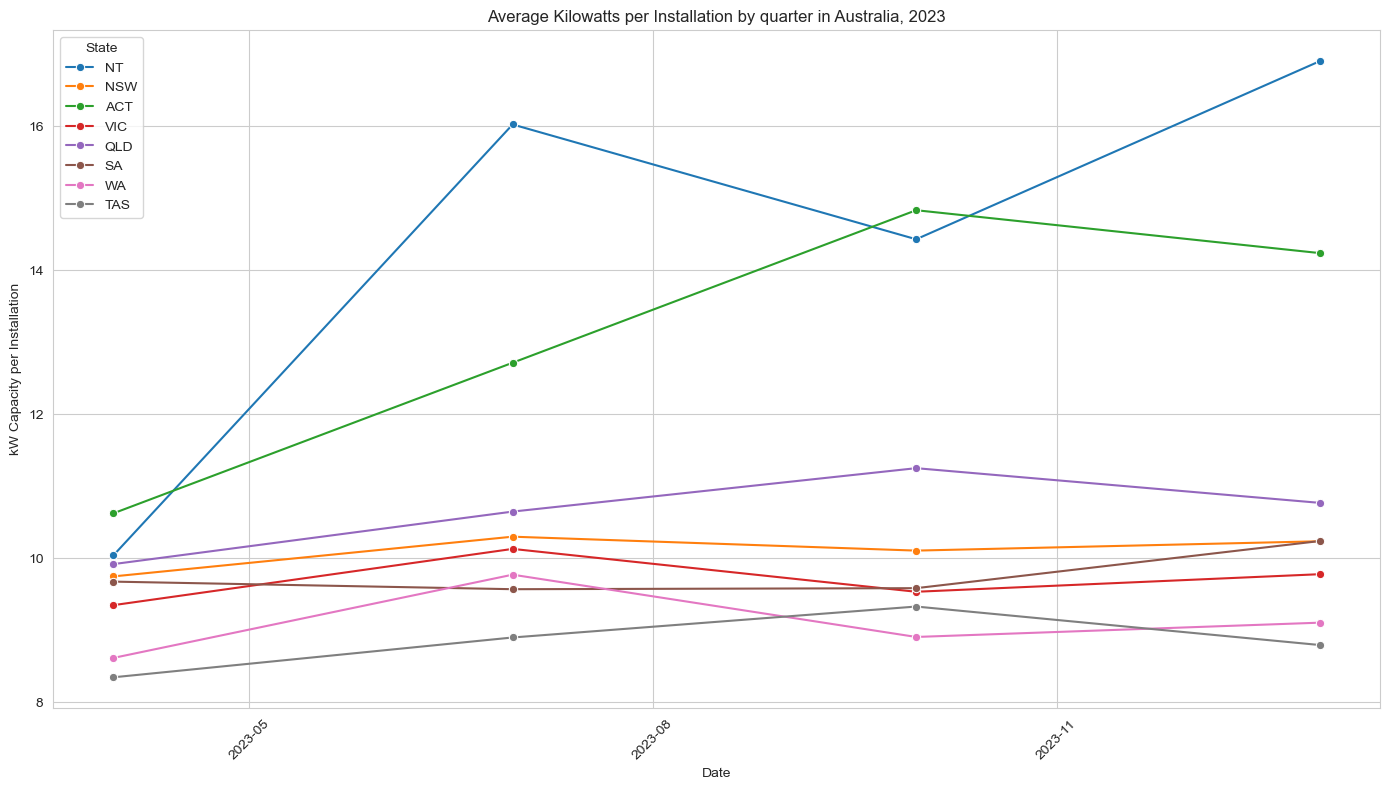

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Plotting the quarterly kW added capacity at state and territory level
plt.figure(figsize=(14, 8))

sns.lineplot(data=sgu_pod_pop, x='date', y='hh_cov', hue='state', palette='tab10', marker='o', ci=None)

# Set title and labels
plt.title('Average Kilowatts per Installation by quarter in Australia, 2023')
plt.xlabel('Date')
plt.ylabel('kW Capacity per Installation')

# Customize x-axis to show every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as 'Year-Month'

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend with state names
plt.legend(title='State')

# Apply tight layout
plt.tight_layout()

# Display the plot
plt.show()



The above plot illustrates that Northern Territory exhibits the highest average capacity per installation, exceeding 16 kW by year-end, while New South Wales shows a steady increase, consistently ranking second. Victoria and Queensland display relatively stable trends. In contrast, South Australia, Western Australia, and Tasmania have the lowest averages, indicating that installations in these regions are generally smaller. Overall, the data suggests a growing prevalence of larger PV installations in NT and NSW, while other states have not experienced similar growth in capacity.

##### 2.2. Installations per capita

I used a state level data and map the penetration of PV installations.

In [143]:
# Group by 'state' and aggregate 'kw', 'quantity', and 'population'
state_data = sgu_pod_pop.groupby('state').agg({
    'kw': 'sum',
    'quantity': 'sum',
    'population': 'sum'
}).reset_index()

# calculate the PV installation by quantity (household) and population level coverage 
state_data['hh_cov'] = (state_data['kw']/sgu_pod_pop['quantity'])
state_data['pop_cov'] = (state_data['quantity']/sgu_pod_pop['population'])*100
print(state_data)

  state        kw  quantity   population    hh_cov  pop_cov
0   ACT  79350.10   7902.00     47222748  26450.03     3.12
1   NSW 974781.81 101438.00  19830115342 324927.27    39.98
2    NT  12955.56   1125.00     23034499  12955.56     0.44
3   QLD 749909.83  78219.00   8486554969 749909.83    30.92
4    SA 246579.58  26700.00   2137094014 246579.58    10.59
5   TAS  47185.70   5478.00    223210653    983.04     2.17
6   VIC 557132.23  63249.00  16837032074  15057.63    25.00
7    WA 259759.58  34273.00   3153118034   6040.92    13.51


I downloaded the state level shapefile from ABS website.

In [144]:
# Load the downloaded state-level shapefile
state_gdf = gpd.read_file("../data/STE_2021_AUST_SHP_GDA94/STE_2021_AUST_GDA94.shp")

In [145]:
# Create a mapping of state names to their abbreviations
state_abbreviations = {
    'New South Wales': 'NSW',
    'Victoria': 'VIC',
    'Queensland': 'QLD',
    'South Australia': 'SA',
    'Western Australia': 'WA',
    'Tasmania': 'TAS',
    'Northern Territory': 'NT',
    'Australian Capital Territory': 'ACT',
    'Other Territories': 'OT',
    'Outside Australia': 'OA'
}

# Add a new column with state abbreviations
state_gdf['state_abbr'] = state_gdf['STE_NAME21'].map(state_abbreviations)

# Display the first few rows of the GeoDataFrame
#print(state_gdf.head());

In [146]:
# Merge the GeoDataFrame with the non-spatial DataFrame
merged_au = australia.merge(state_data, left_on='state_abbr', right_on='state')

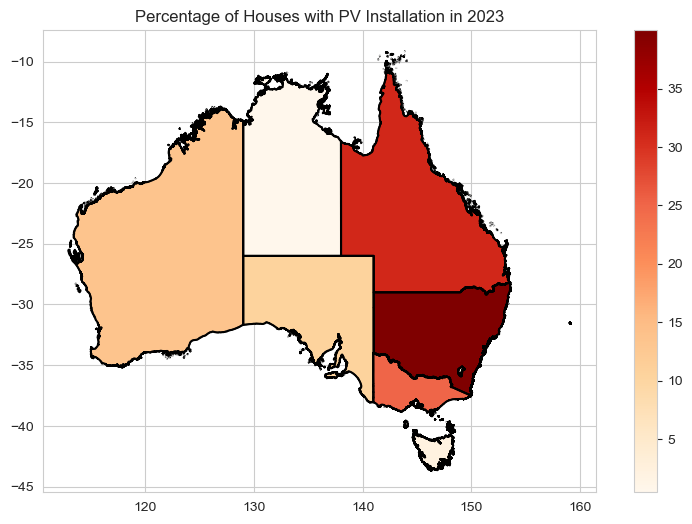

In [147]:
# Plot the population adjusted
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_au.boundary.plot(ax=ax, edgecolor='k')
merged_au.plot(column='pop_cov', cmap='OrRd', edgecolor='k', legend=True, ax=ax)
plt.title('Percentage of Houses with PV Installation in Australia, 2023')
plt.show()



The map shows that the eastern states have higher solar energy adoption rates, indicating more widespread installation of solar systems. This trend suggests greater public awareness and the positive impact of government policies. In contrast, the Northern Territory (NT) has fewer installations, which likely contributes to a smaller overall energy output due to the limited scale of its solar systems